In [1]:
%run radiomorpho.py
dirs = ('101first_fit', '101nvss_fit')
files, images = readImagesFromDirs(dirs) #cargamos todas las imagenes

error reading image 101first_fit/J0331-2849_z1.0890p_1.09Mpc.fi.fit or 101nvss_fit/J0331-2849_z1.0890p_1.09Mpc.nv.fit


Para cada imágen obtenemos información de *aperturas* y *cerraduras*. Está información consiste en los cambios de areas registrados al hacer una *aperturas* o *cerraduras* con un tamaño de disco $n$, donde $n$ va desde 1 hasta el valor indicado, en esta caso 8. Es importante considerar que los tamaños de disco son impares, empezando en 3. Nuestro parámetro de 8 indica un diametro máximo del disco de 17 pixeles y que las imágenes NVSS son de *32 x 32*.

In [2]:
dt = []
for im in images:
    dt.append( get_open_close_info(im[1], 8) )
dt = np.array(dt)

Podemos aplicar métodos que usan distancias eucledianas. Si aplicamos un método como PCA sobre las primeras diez imágenes comenzamos a ver que los resultados no son del todo lo que esperaríamos.

In [3]:
from sklearn import decomposition
dat = dt[:10, :8]
pca = decomposition.PCA(n_components=2)
pca.fit(dat)
Y = pca.transform(dat)
xs, ys = Y[:,0] , Y[:,1]

In [4]:
class DataBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self, fig, ax1, ax2, xs, ys):
        self.lastind = 0

        self.text = ax1.text(0.05, 0.95, 'selected: none',
                            transform=ax1.transAxes, va='top')
        self.selected, = ax1.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)
        self.xs = xs
        self.ys = ys
        self.fit = fig

        self.ax2 = ax2

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(self.xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - self.xs[event.ind], y - self.ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        img = readNormalizedImg(files[dataind][1])
        self.ax2.cla()
        self.ax2.imshow(img, cmap='gray')

        self.selected.set_visible(True)
        self.selected.set_data(self.xs[dataind], self.ys[dataind])

        self.text.set_text('selected: {0} | {1}'.format(dataind,
            '.'.join(files[dataind][0].split('/')[1].split('.')[:-2])))
        self.fig.canvas.draw()

<IPython.core.display.Javascript object>


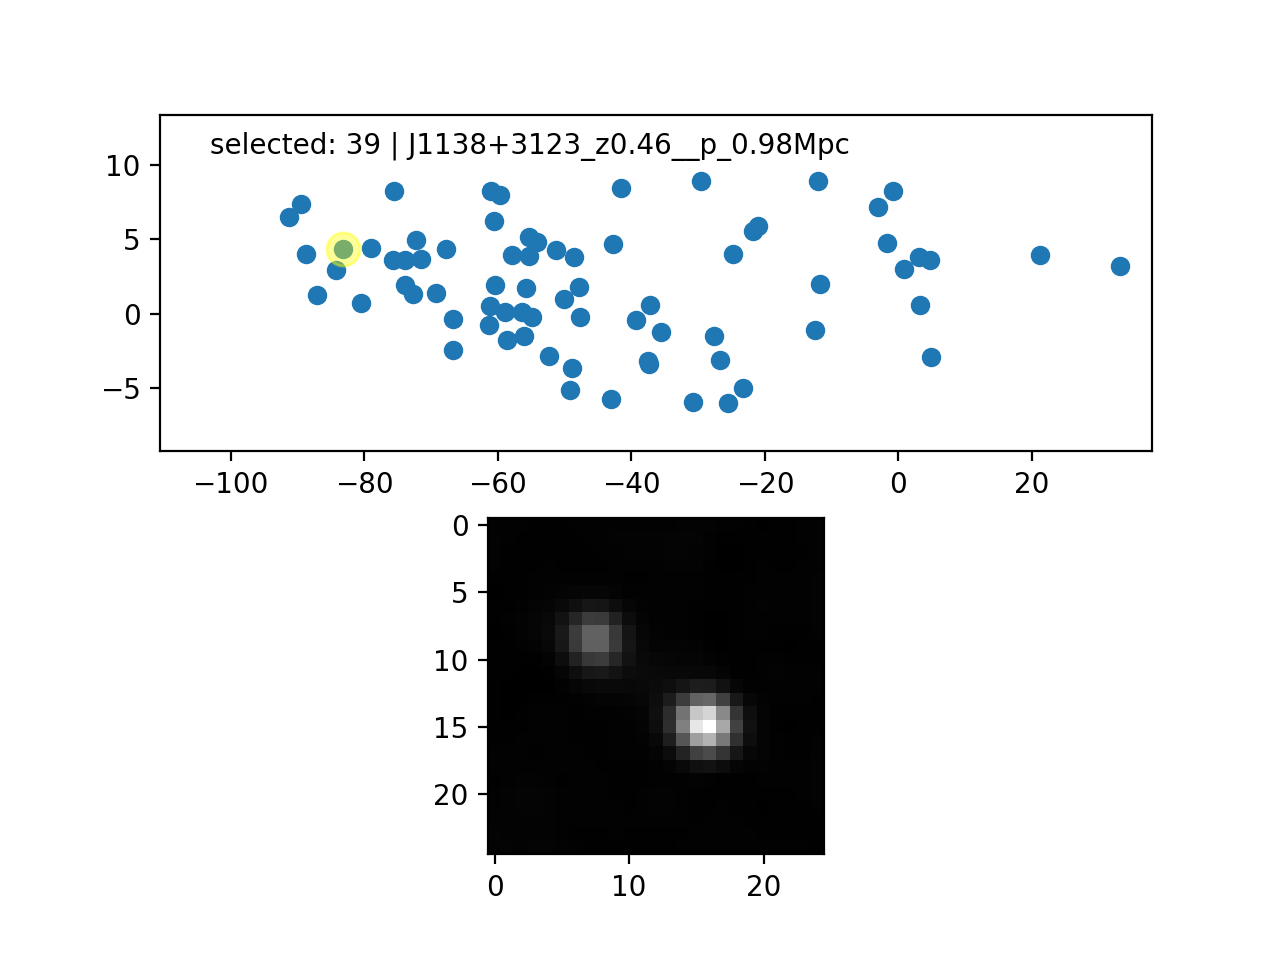

In [8]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(2, 1)
line, = ax.plot(xs, ys, 'o', picker=5)
browser = DataBrowser(fig, ax, ax2, xs, ys)
fig.canvas.mpl_connect('pick_event', browser.onpick)
fig.canvas.mpl_connect('key_press_event', browser.onpress)
plt.show()

In [123]:
from matplotlib import offsetbox
def plot_embedding(X, Y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(Y.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
# #                 don't show points that are too close
#                 continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(Y[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

<IPython.core.display.Javascript object>


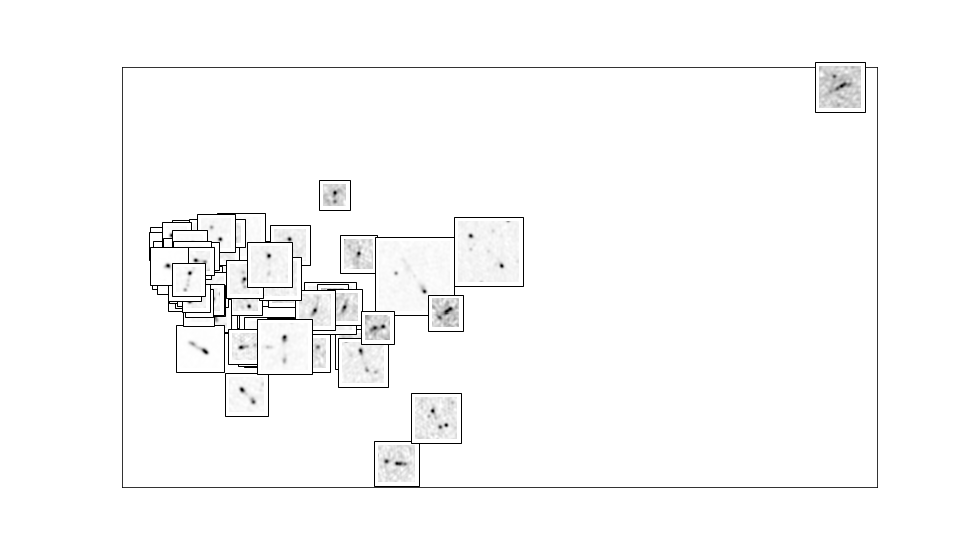

In [128]:
# %matplotlib inline
import matplotlib.pyplot as plt
plot_embedding(Y, images[:, 1])

<IPython.core.display.Javascript object>


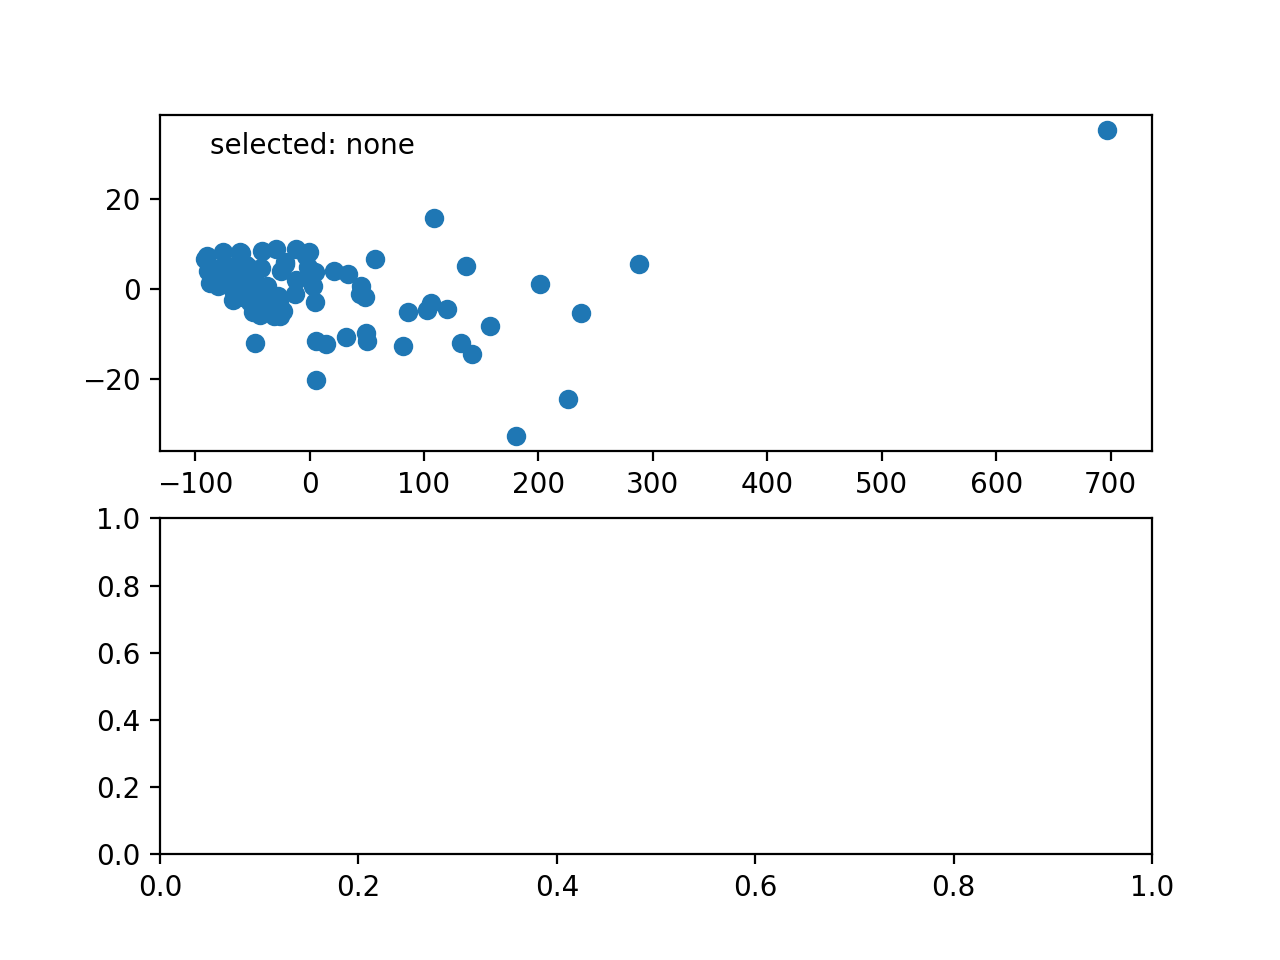

In [7]:
from sklearn import decomposition
dat = dt[:, :8]
pca = decomposition.PCA(n_components=2)
pca.fit(dat)
Y = pca.transform(dat)
xs, ys = Y[:,0] , Y[:,1]

%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(2, 1)
line, = ax.plot(xs, ys, 'o', picker=5)
browser = DataBrowser(fig, ax, ax2, xs, ys)
fig.canvas.mpl_connect('pick_event', browser.onpick)
fig.canvas.mpl_connect('key_press_event', browser.onpress)
plt.show()

<IPython.core.display.Javascript object>


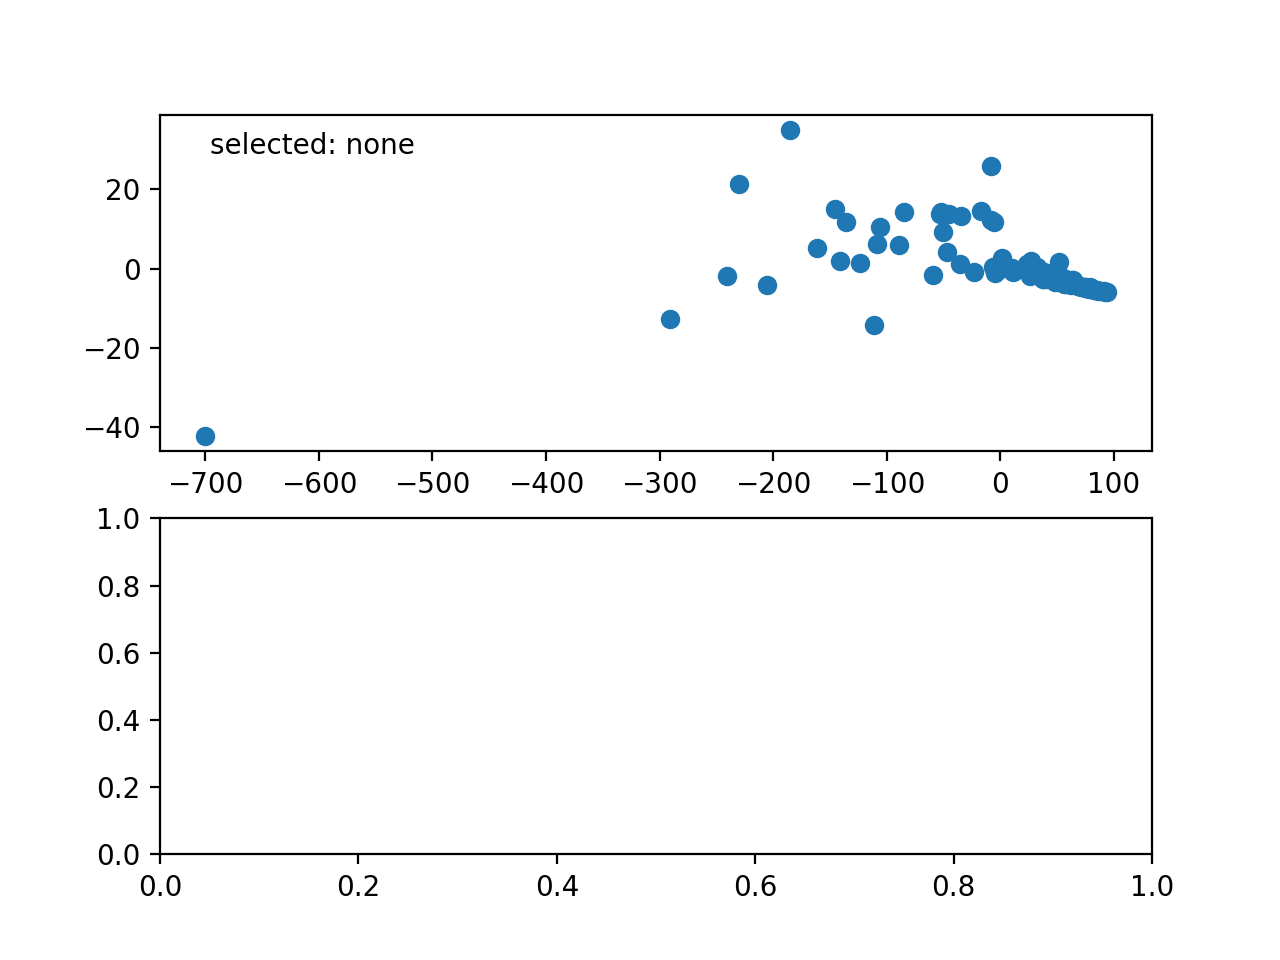

In [6]:
from sklearn import decomposition , manifold
dat = dt[:, :8]
pca = decomposition.PCA(n_components=2)
pca.fit(dat)
Y = manifold.Isomap(10, n_components=2).fit_transform(dat)
xs, ys = Y[:,0] , Y[:,1]

%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(2, 1)
line, = ax.plot(xs, ys, 'o', picker=5)
browser = DataBrowser(fig, ax, ax2, xs, ys)
fig.canvas.mpl_connect('pick_event', browser.onpick)
fig.canvas.mpl_connect('key_press_event', browser.onpress)
plt.show()